## Extract libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import os

## Obtain data

In [87]:
img_files = os.listdir("pdf2png")

In [88]:
data = {}
img_shape = None
count = 0
for img_file in img_files:
    img = cv2.imread("pdf2png/"+img_file,0)[600:1700,200:3400]
    img_shape = img.shape
    x = ['a_req_min' , 'a_req_max' , 'b_min' , 'b_max']
    with open("dilated/harris/del_"+img_file[:-4]+".npz","rb") as f:
        points = {i: np.load(f)[i] for i in x}
    with open("dilated/harris/info_"+img_file[:-4]+".npz","rb") as f:
        a = np.load(f)
        centroids = a["centroids"]
    data[count] = {"img":img, "points":points,"centroids":centroids}
    count+=1

In [89]:
import pickle
with open("send_data.pkl","wb") as f:
    pickle.dump(data,f)

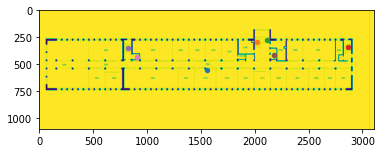

In [92]:
plt.figure()
plt.imshow(data[0]["img"])
for i in data[0]["centroids"]:
    plt.scatter(i[0],i[1], s= 20)

## Align images using offsets

In [79]:
import pickle

In [80]:
with open("send_data.pkl","rb") as f:
    data = pickle.load(f)

In [93]:
h,w = data[0]["img"].shape

In [126]:
input_data = []
count = 0 
for i in range(len(data)):
    if count==0:
        offset_setting = (data[count]["points"]['a_req_min'],  data[count]["points"]['b_min'])
        for x in range(h):
            for y in range(w):
                if data[count]["img"][x,y]<200:
                    input_data.append([x,y, count*5, 0, 0, 0])
        for i in data[count]["centroids"]:
            input_data.append([int(i[0]),int(i[1]), count*5, 0, 255, 255 ])
    else:
        offset_diff = (data[count]["points"]['a_req_min'],  data[count]["points"]['b_min'])
        offset_diff = (offset_diff[0]- offset_setting[0], offset_diff[1]- offset_setting[1])
        for x in range(h):
            for y in range(w):
                if data[count]["img"][x,y]<200:
                    input_data.append([(x+h-offset_diff[0])%h,(y+w-offset_diff[1])%w, count*5, 0, 0, 0])
        for i in data[count]["centroids"]:
            input_data.append([(int(i[0])+h-offset_diff[0])%h,(int(i[1])+w-offset_diff[1])%w, count*5, 0, 255, 255 ])

        
    count+=1

## Generate pointclouds

In [127]:
L = ["{},{},{},{},{},{}\n".format(i[0],i[1],100*i[2], 255-i[3],255- i[4],255-  i[5]) for i in input_data]

In [128]:
with open("overall.txt","w") as f:
    f.writelines(L)

In [146]:
input_data_2 = []
count = 0 
for i in range(len(data)):
    if count==0:
        offset_setting = (data[count]["points"]['a_req_min'],  data[count]["points"]['b_min'])
        for i in data[count]["centroids"][1:]:
            input_data_2.append([int(i[1]),int(i[0]), count*5, 0, 255, 255 ])
    elif count<len(data)-1:
        offset_diff = (data[count]["points"]['a_req_min'],  data[count]["points"]['b_min'])
        offset_diff = (offset_diff[0]- offset_setting[0], offset_diff[1]- offset_setting[1])
        for i in data[count]["centroids"][1:]:
            input_data_2.append([(int(i[1])+h-offset_diff[0])%h,(int(i[0])+w-offset_diff[1])%w, count*5, 0, 255, 255 ])

        
    count+=1

In [147]:
L = ["{},{},{},{},{},{}\n".format(int(i[0]),int(i[1]),int(5*j+100*i[2]), 255-i[3],255- i[4],255-  i[5]) for i in input_data_2[:-1] for j in range(100)]

In [148]:
with open("stairs.txt","w") as f:
    f.writelines(L)

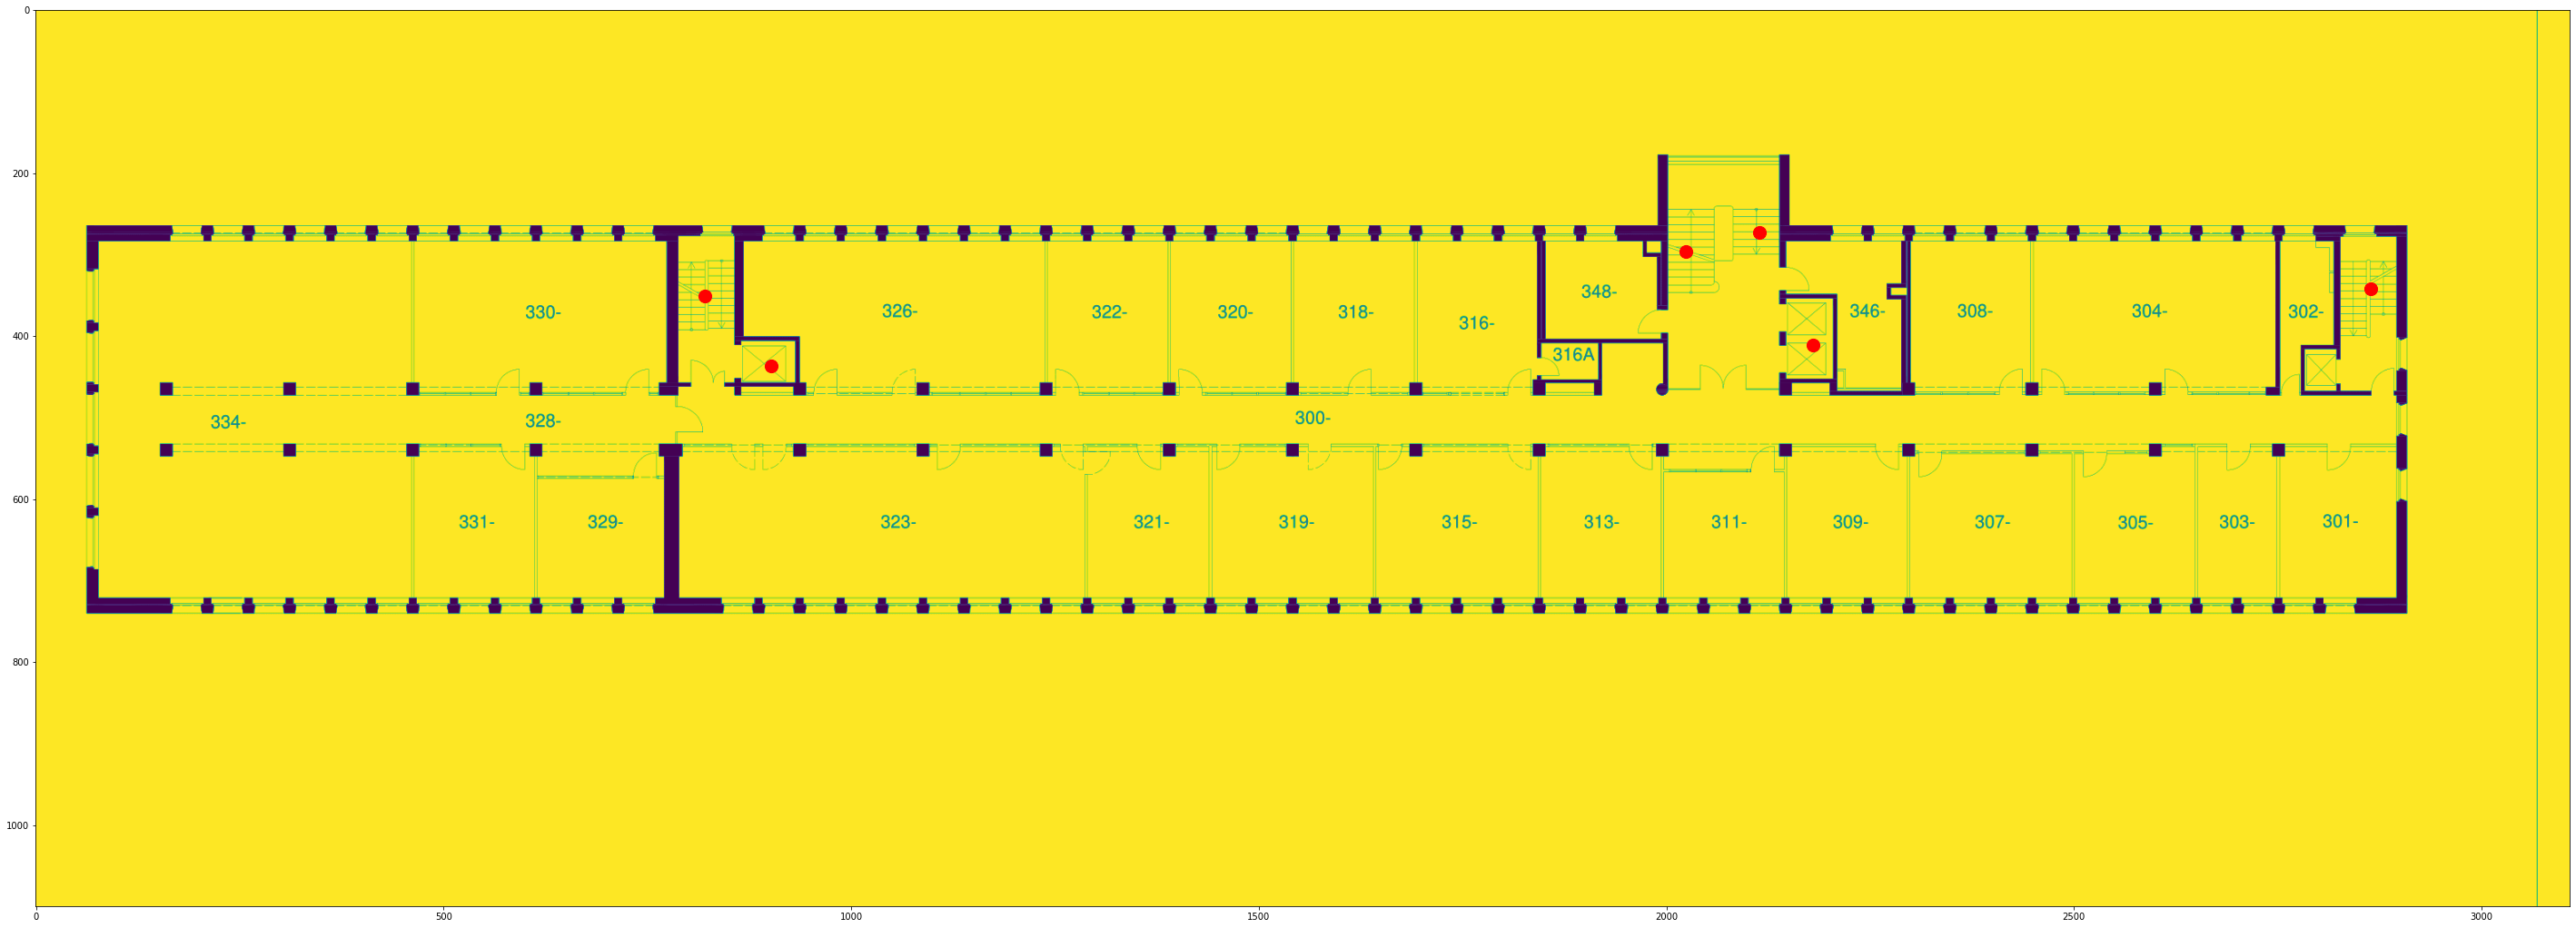

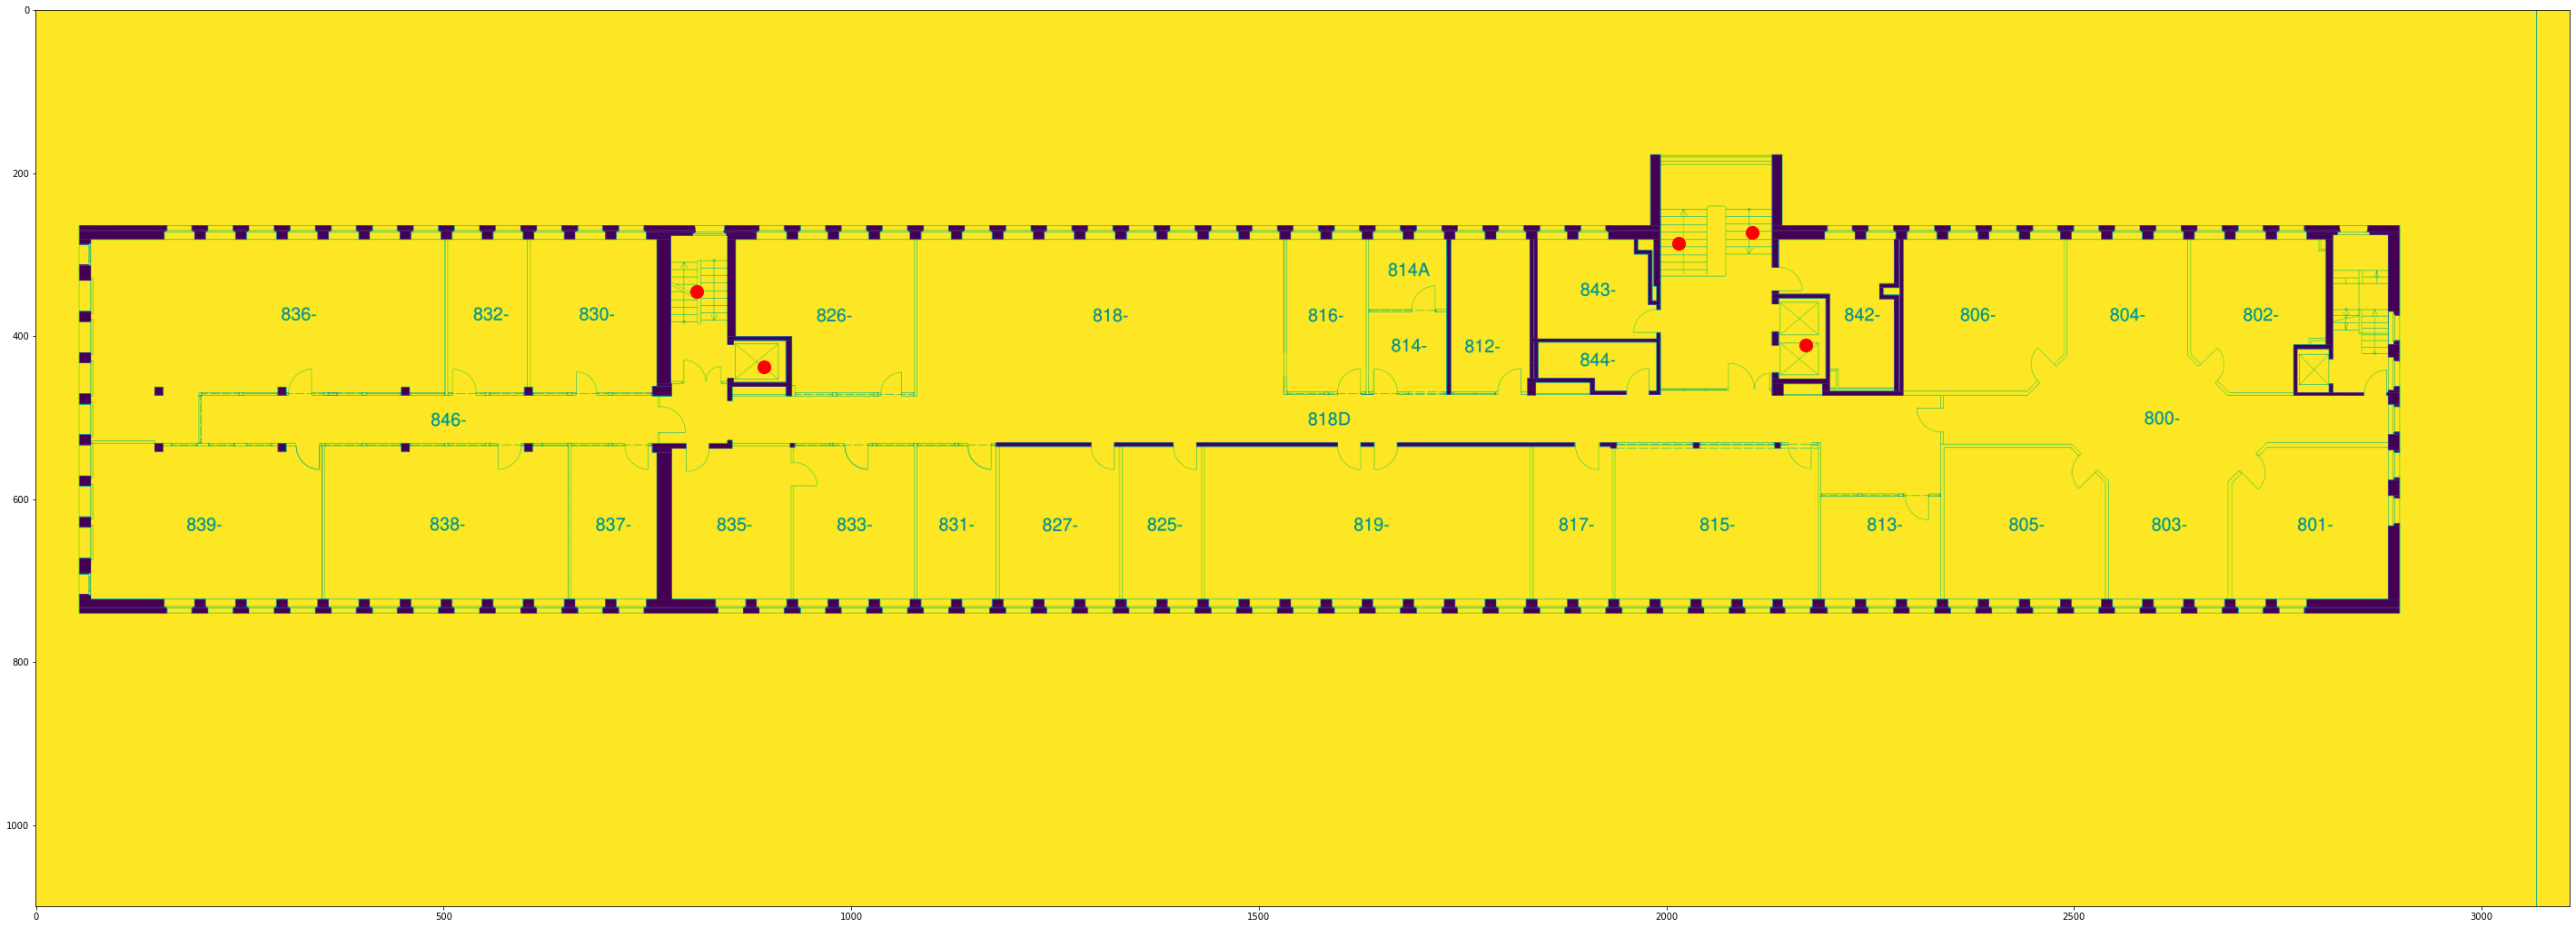

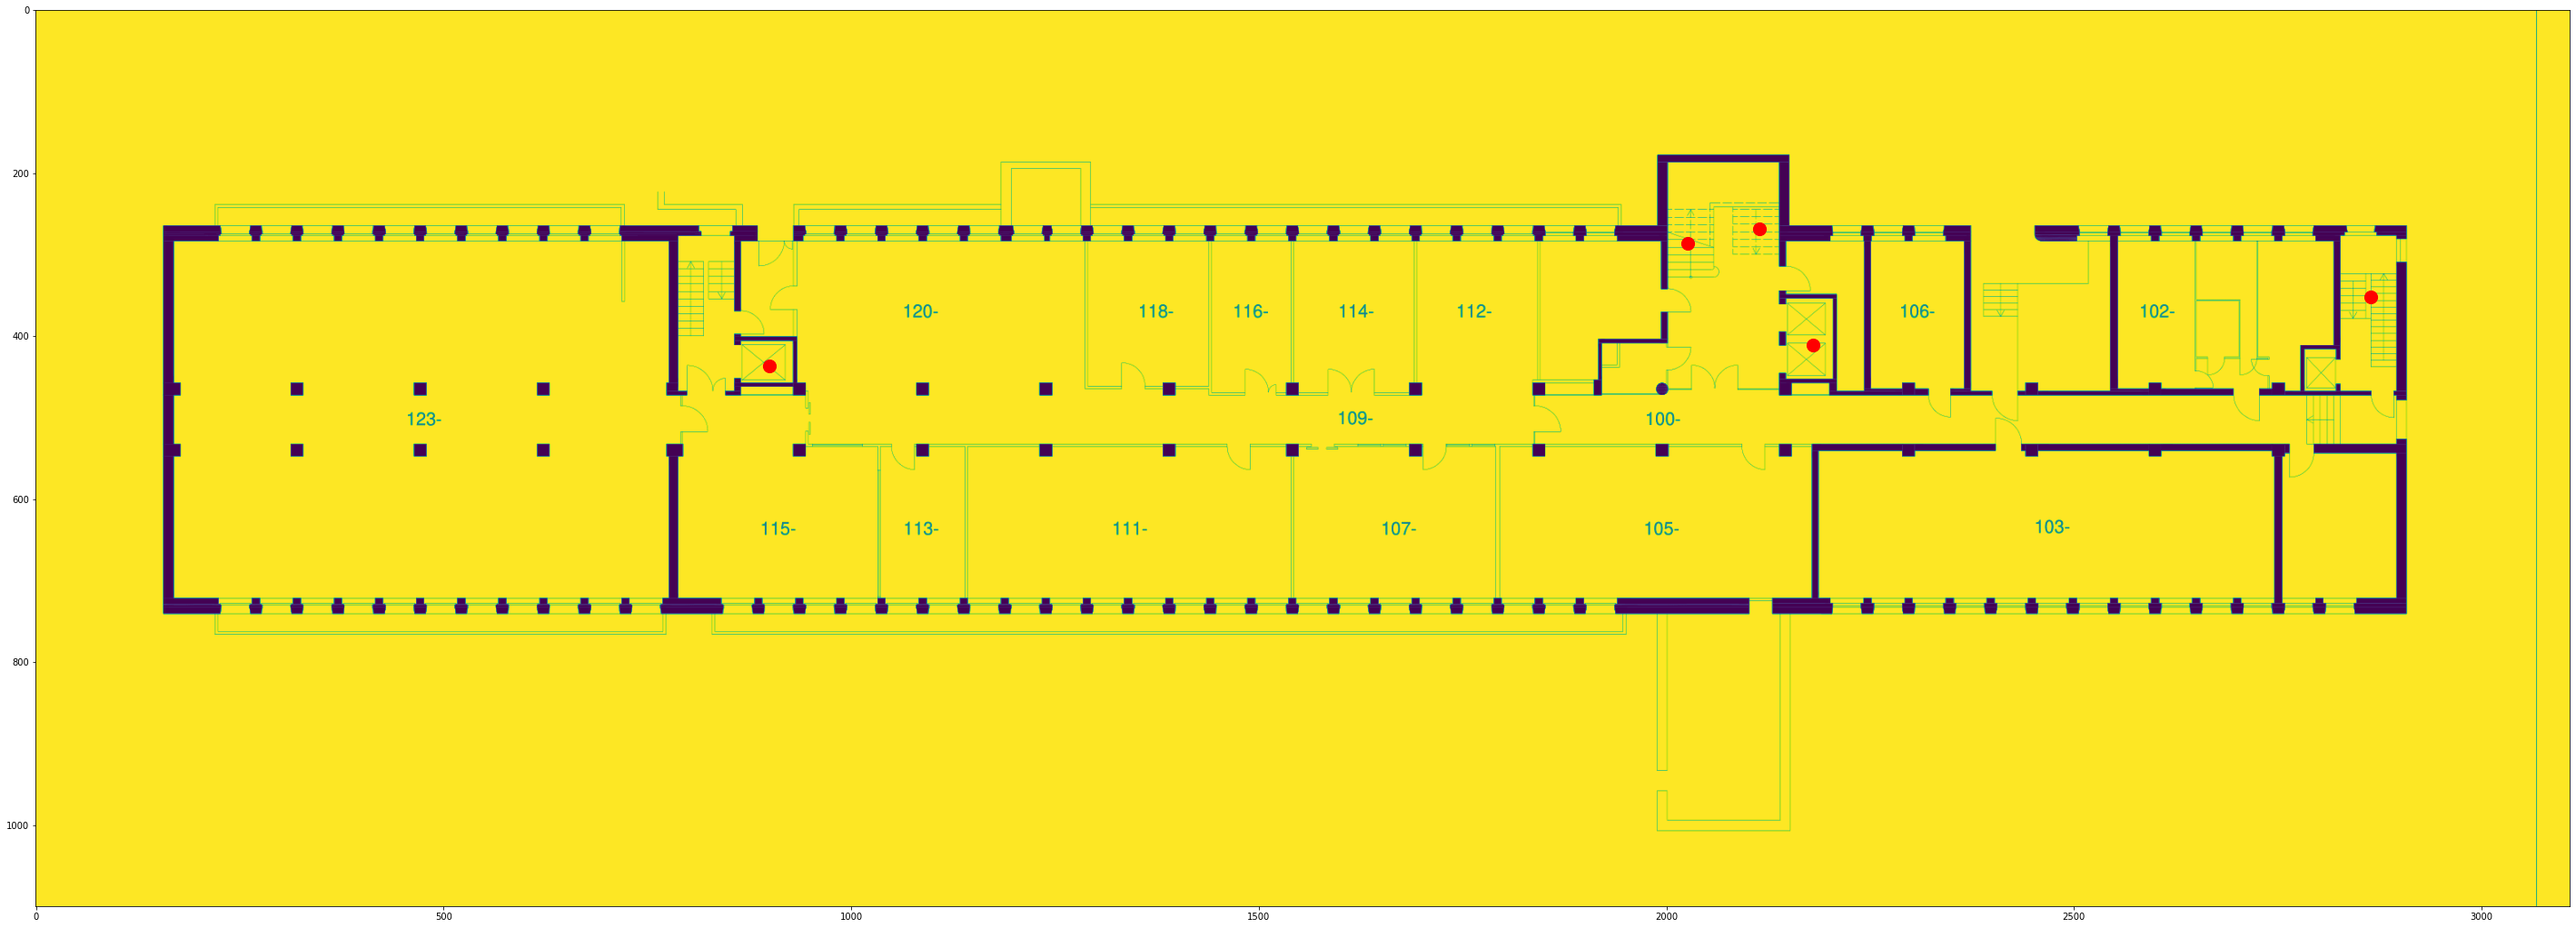

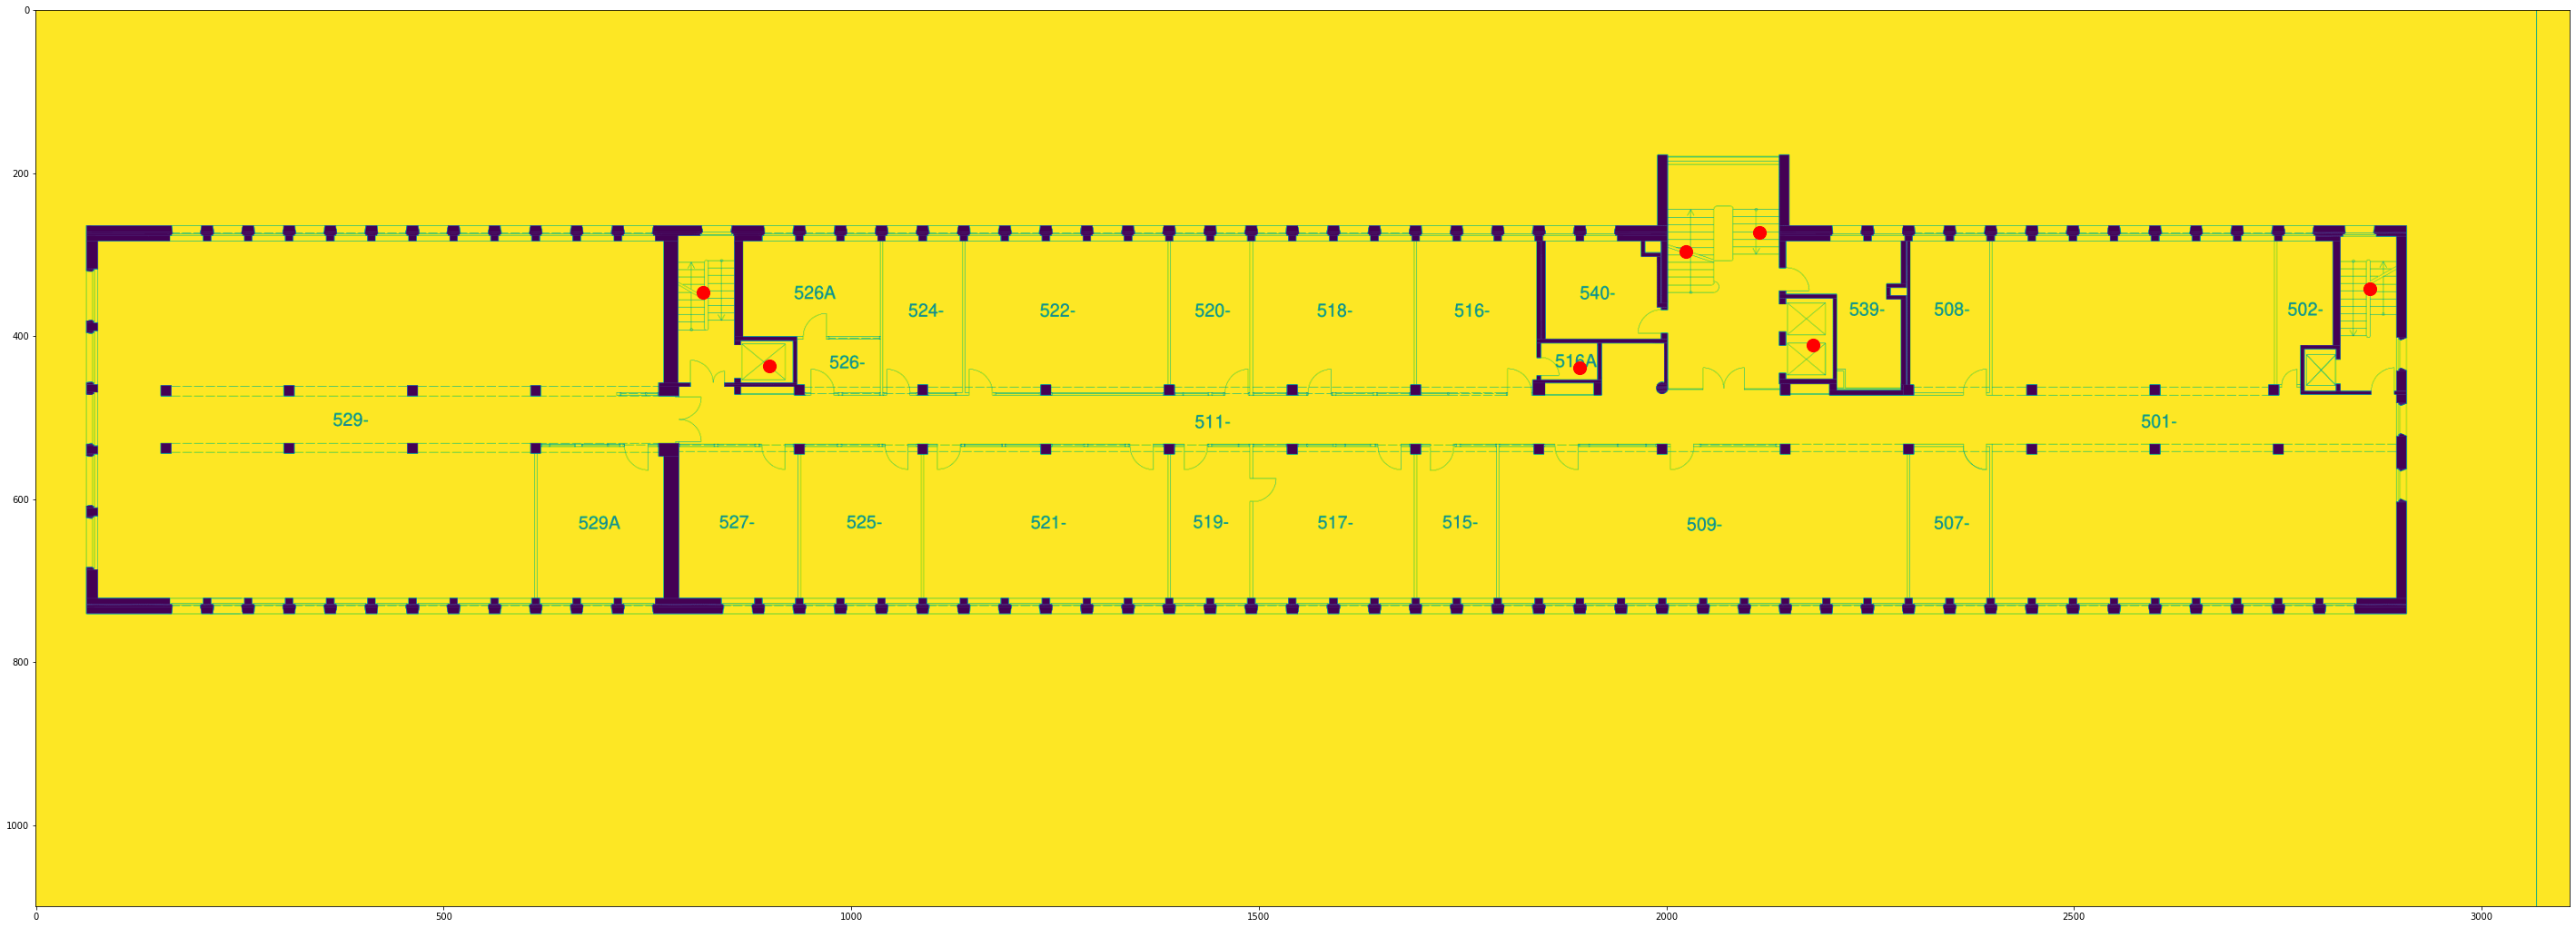

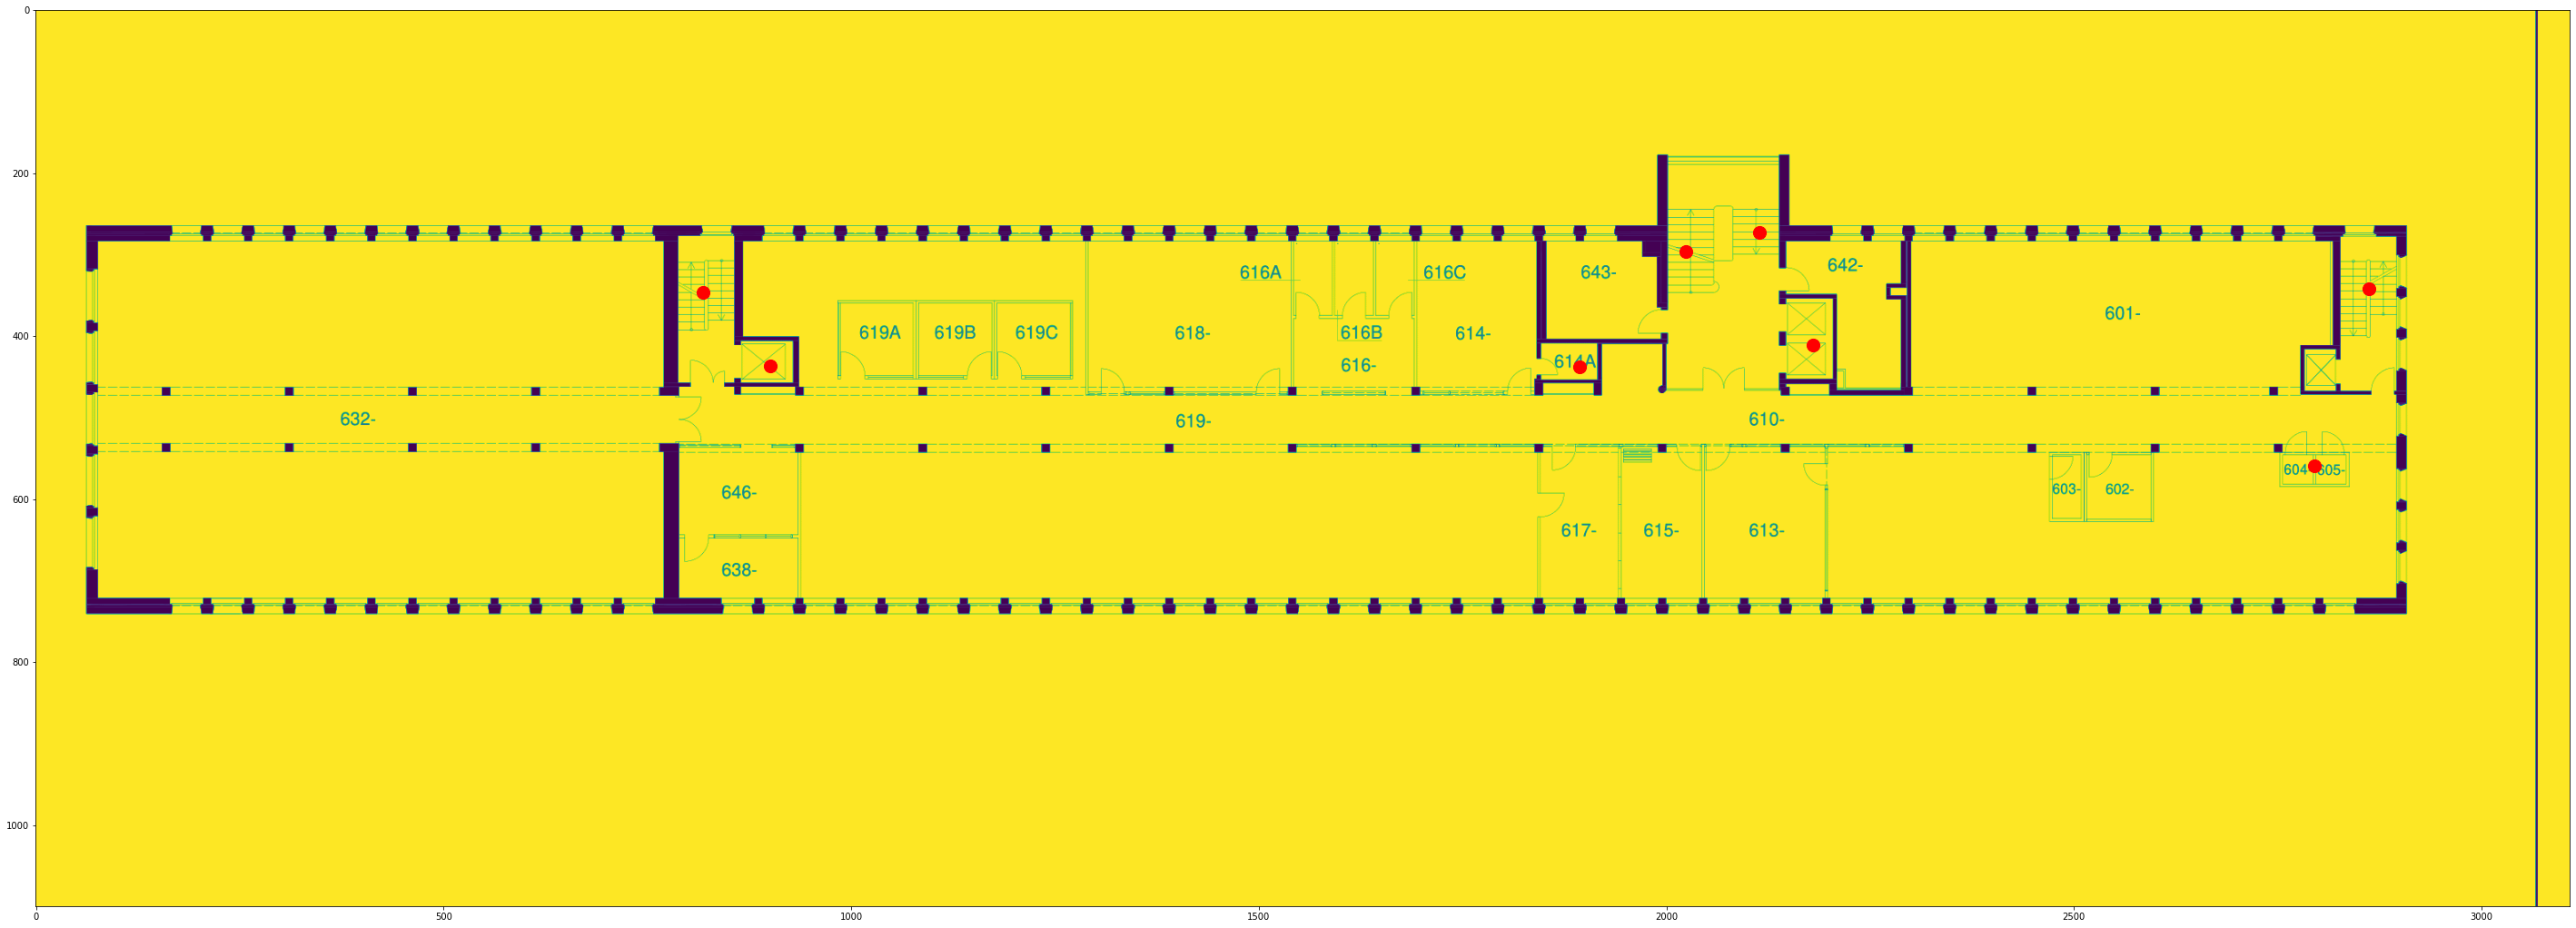

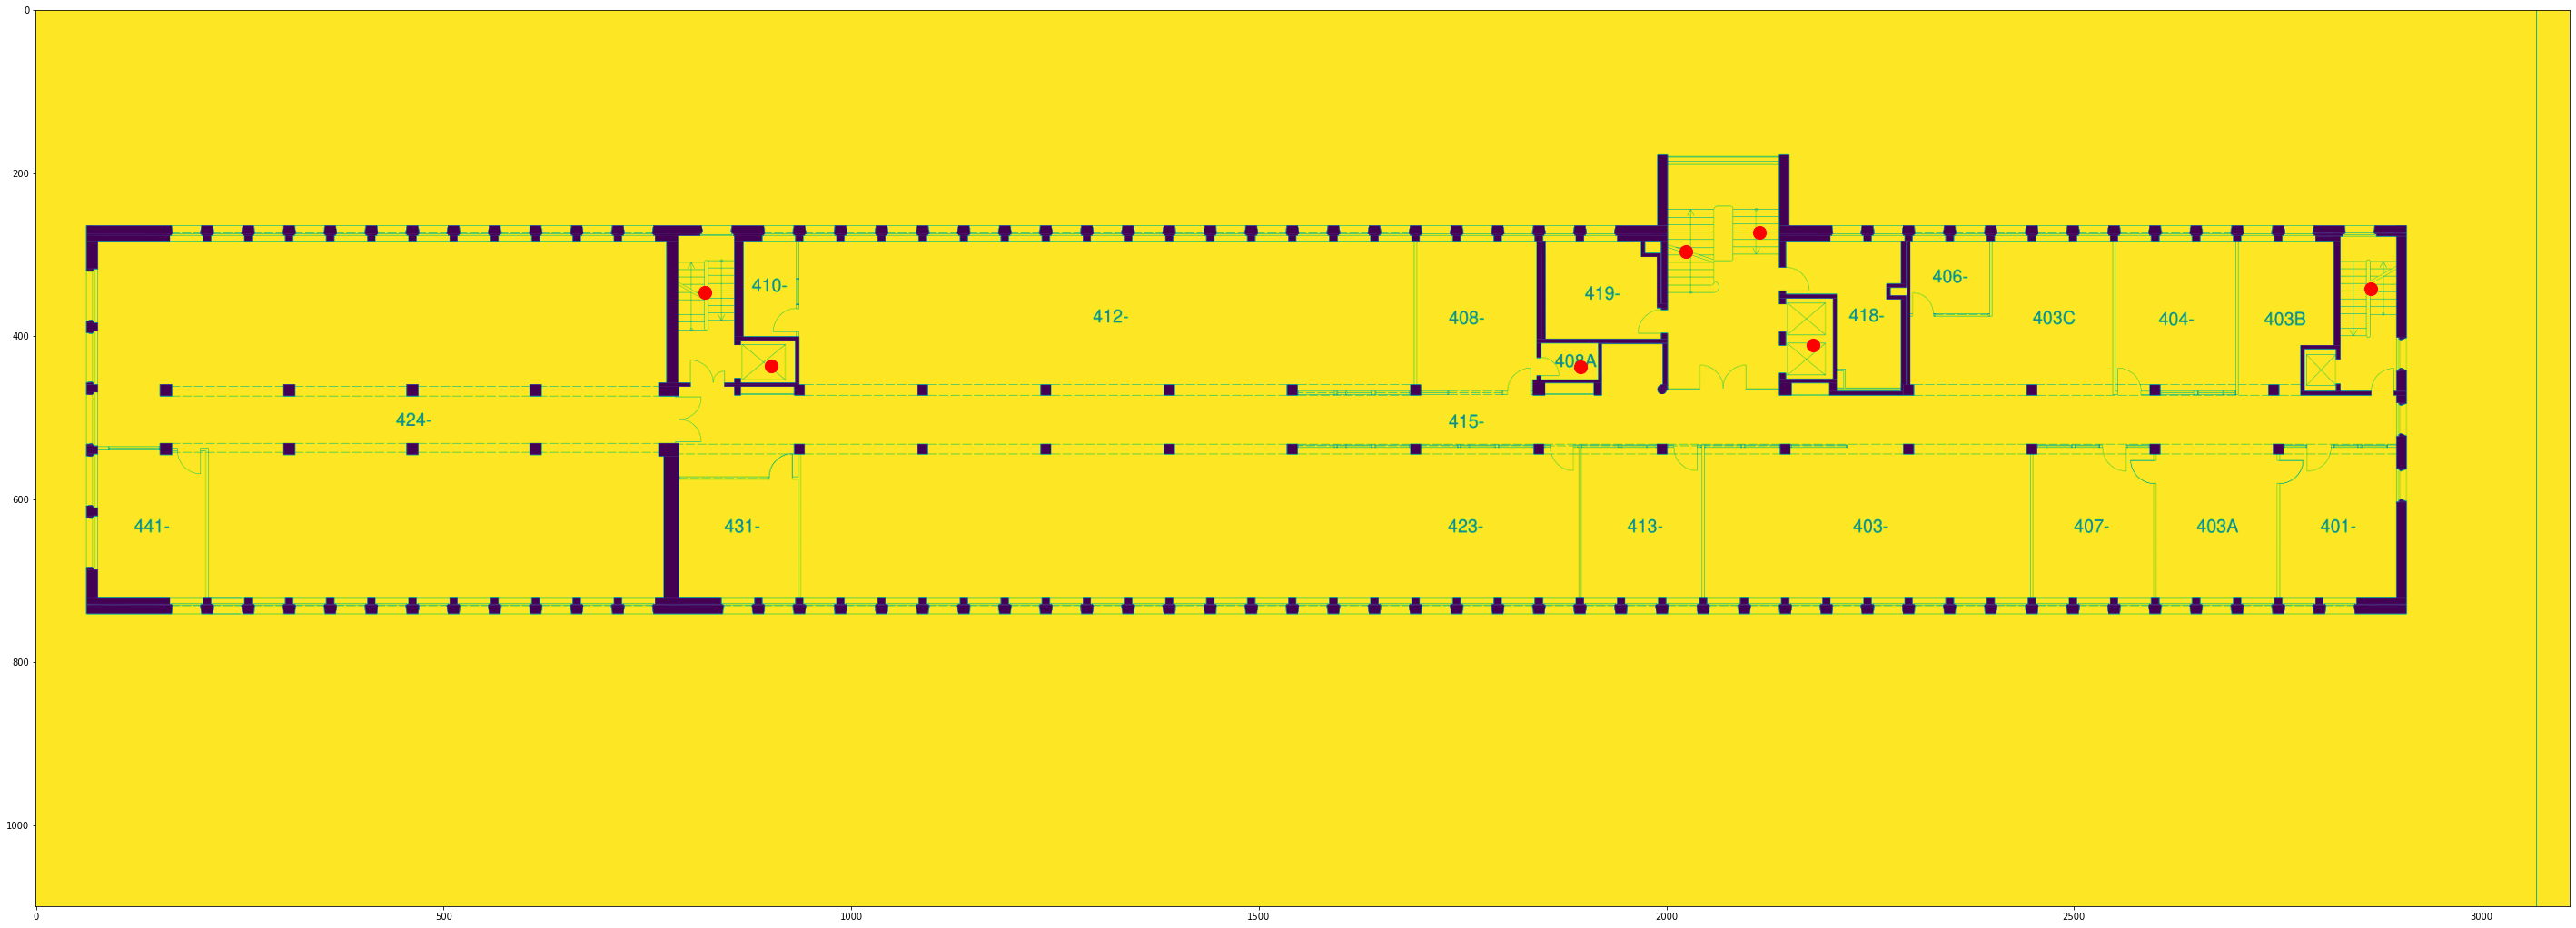

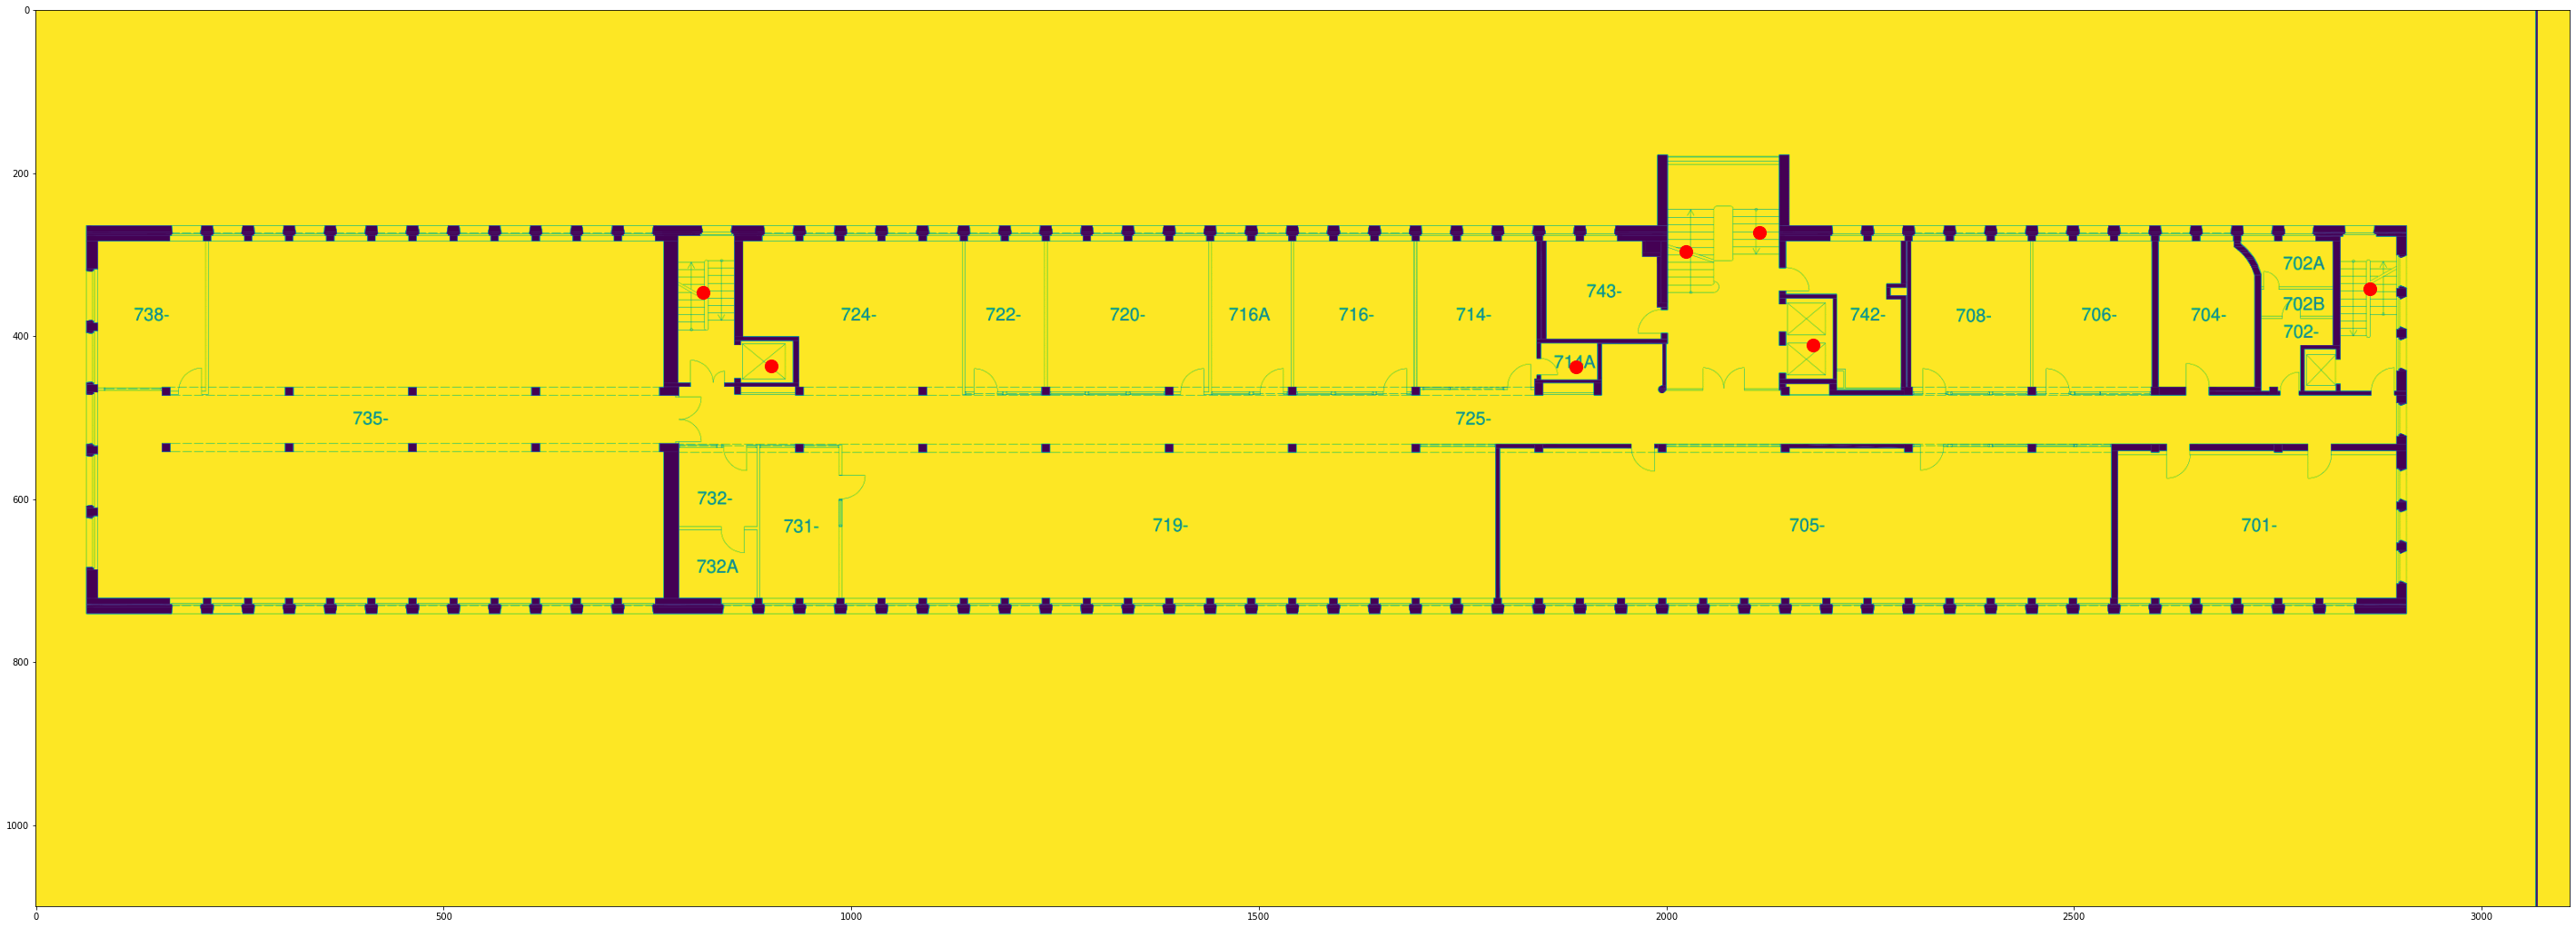

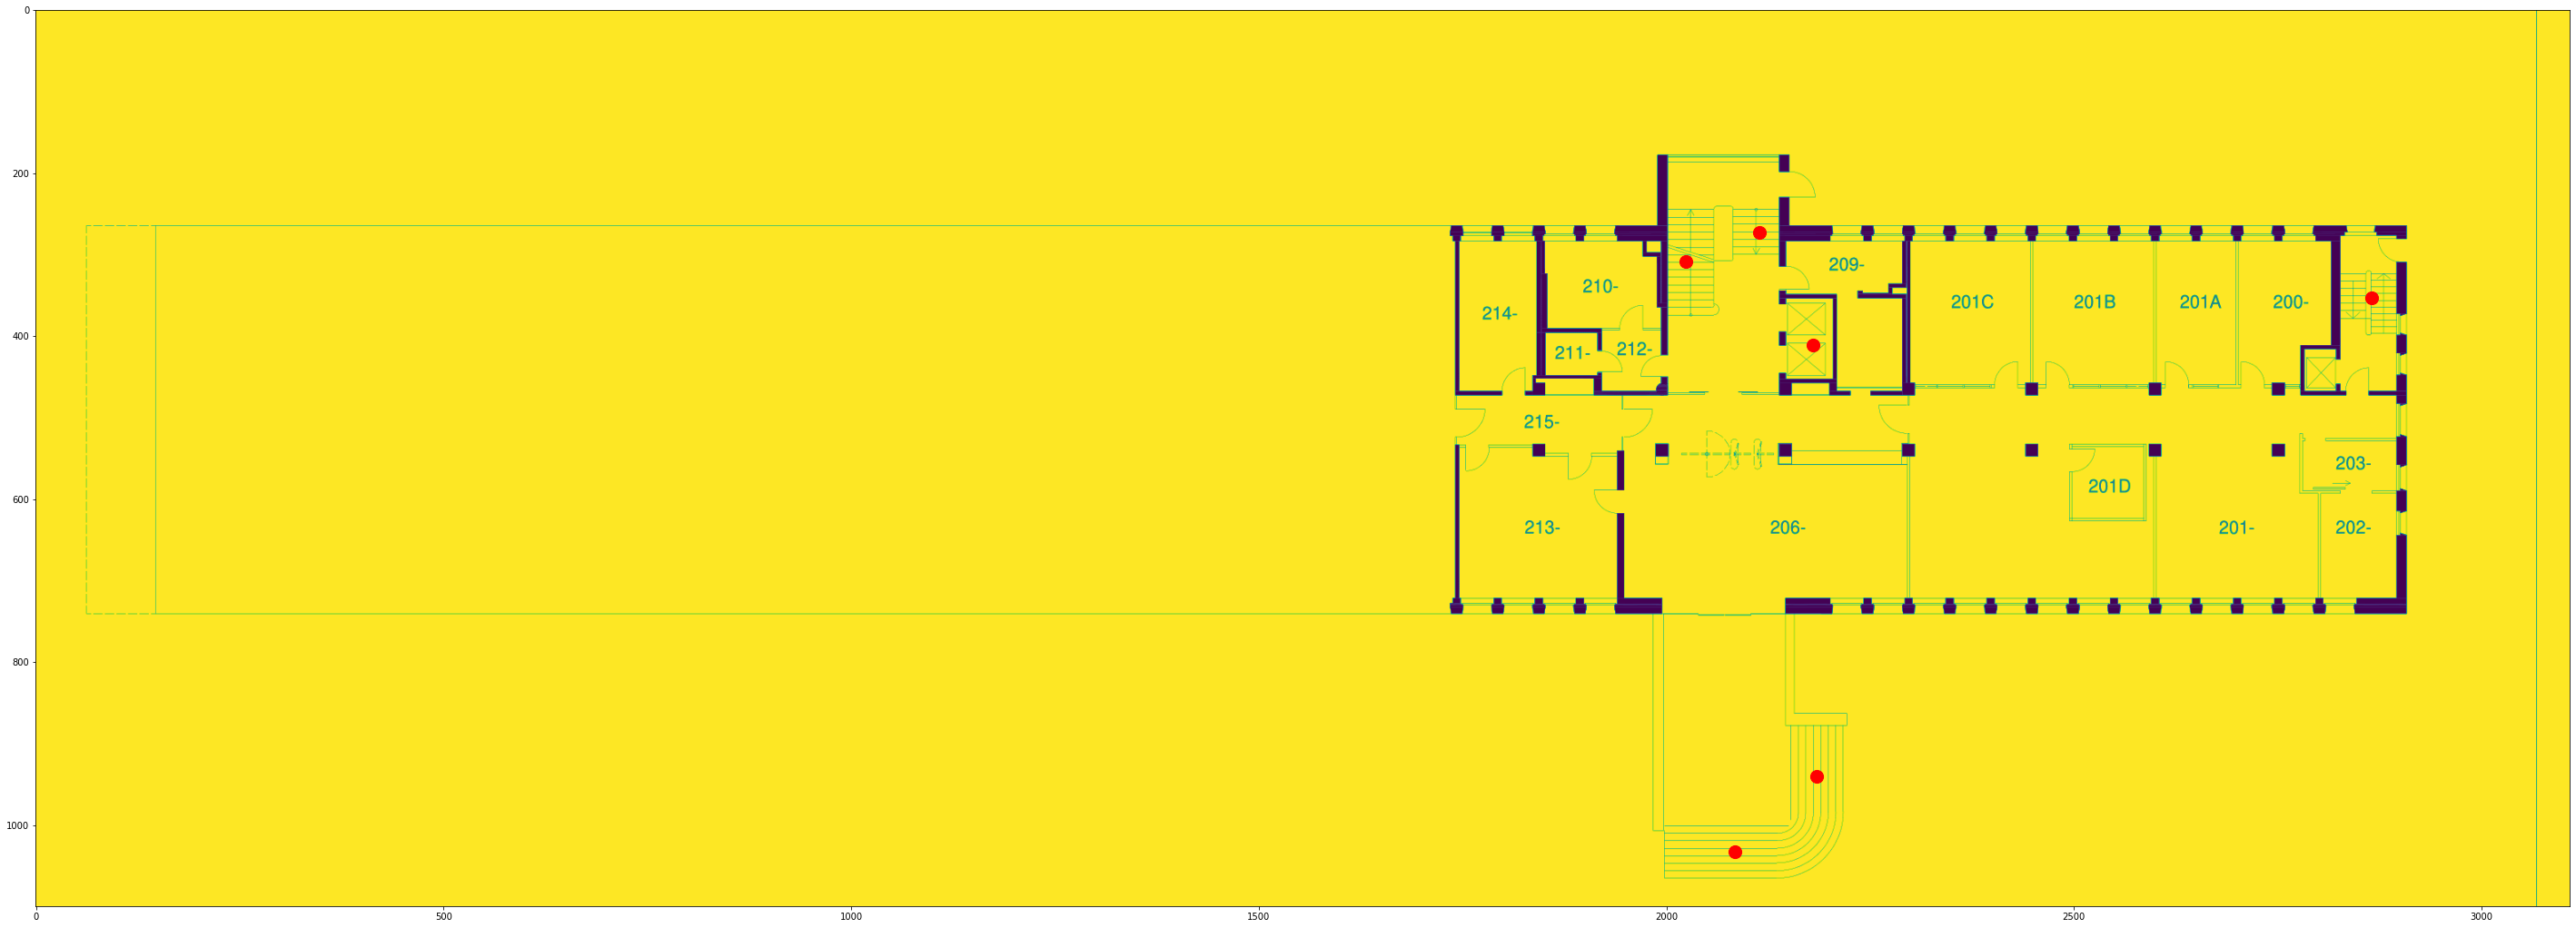

In [112]:
for i in range(len(data)):
    plt.figure(figsize=(50,20))
    plt.imshow(data[i]["img"])
    for j in data[i]["centroids"][1:]:
        plt.scatter(j[0], j[1], s = 200, c= "red")